## salary prediction 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("Jobs_NYC_Postings.csv")
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [5]:
df.shape

(5120, 30)

In [6]:
df.isnull().sum().sort_values(ascending=False)

Recruitment Contact              5120
Post Until                       3616
Work Location 1                  3229
Hours/Shift                      3210
Additional Information           1862
Preferred Skills                 1219
To Apply                          426
Full-Time/Part-Time indicator     117
Minimum Qual Requirements          43
Job ID                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Agency                              0
Salary Range To                     0
Salary Range From                   0
Career Level                        0
Job Category                        0
Title Code No                       0
Level                               0
Title Classification                0
Civil Service Title                 0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Residency Re

In [7]:
df["salary_mid"] = (df["Salary Range From"] + df["Salary Range To"]) / 2

In [8]:
df["salary_mid"].describe()

count      5120.000000
mean      77301.899928
std       36748.806003
min          15.000000
25%       58405.000000
50%       75745.500000
75%       98571.000000
max      235500.000000
Name: salary_mid, dtype: float64

### Salary Midpoint Distribution

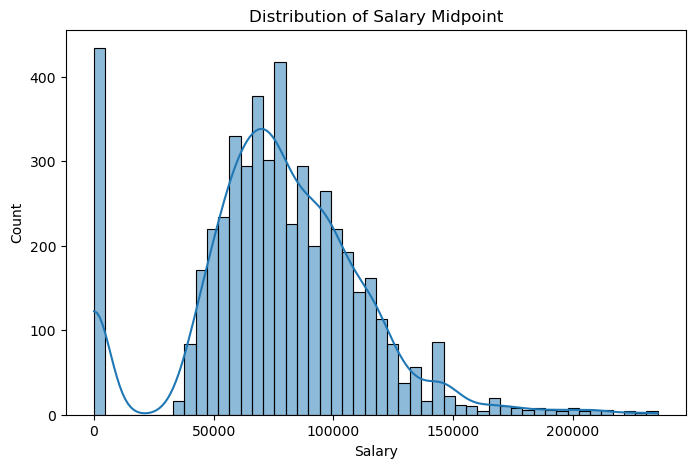

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["salary_mid"], bins=50, kde=True)
plt.title("Distribution of Salary Midpoint")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

### Salary Boxplot

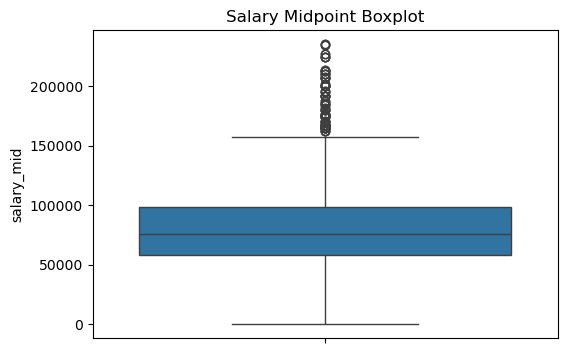

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["salary_mid"])
plt.title("Salary Midpoint Boxplot")
plt.show()

### Salary by Job Category

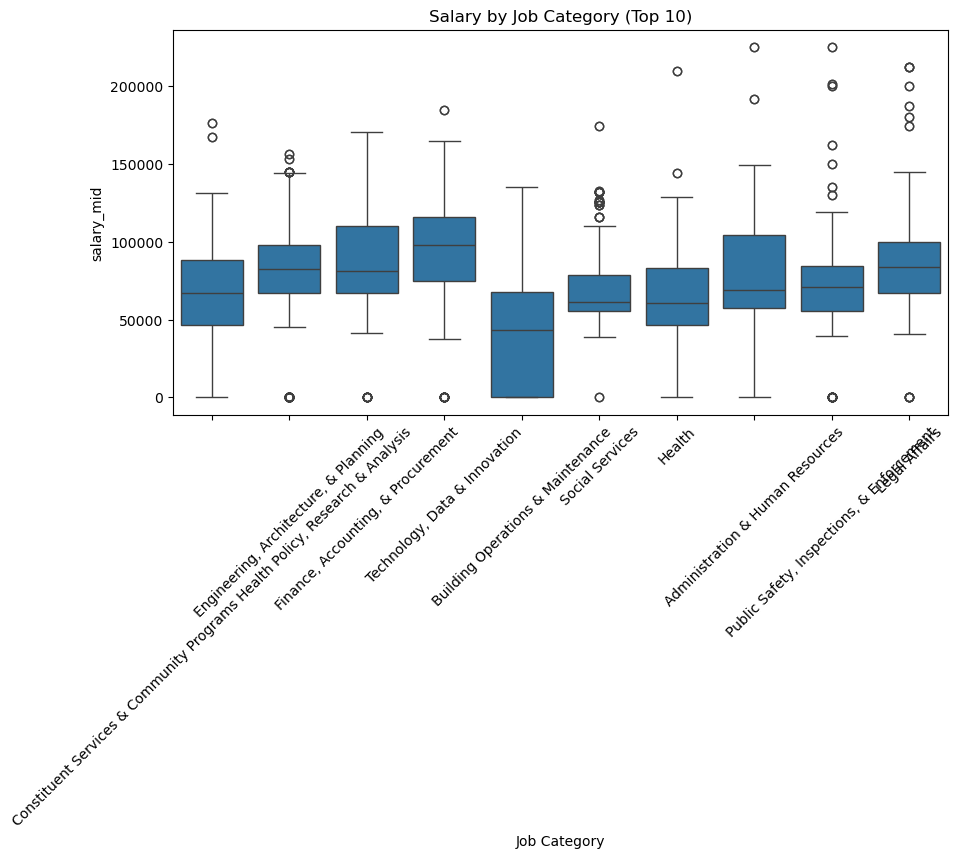

In [11]:
top_categories = df["Job Category"].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df["Job Category"].isin(top_categories)],
    x="Job Category",
    y="salary_mid"
)
plt.xticks(rotation=45)
plt.title("Salary by Job Category (Top 10)")
plt.show()

### Average Salary by Career Level

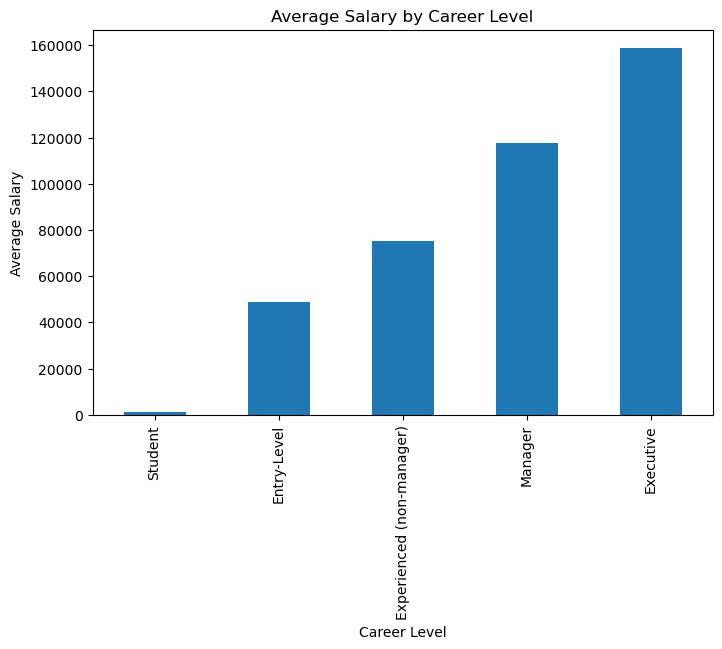

In [12]:
career_salary = df.groupby("Career Level")["salary_mid"].mean().sort_values()

plt.figure(figsize=(8,5))
career_salary.plot(kind="bar")
plt.title("Average Salary by Career Level")
plt.ylabel("Average Salary")
plt.show()

 ### Full-Time vs Part-Time Salary

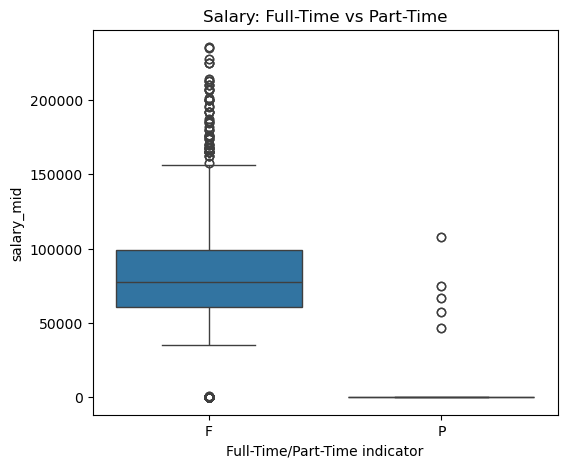

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x="Full-Time/Part-Time indicator",
    y="salary_mid"
)
plt.title("Salary: Full-Time vs Part-Time")
plt.show()

### Top 10 Agencies by Average Salary

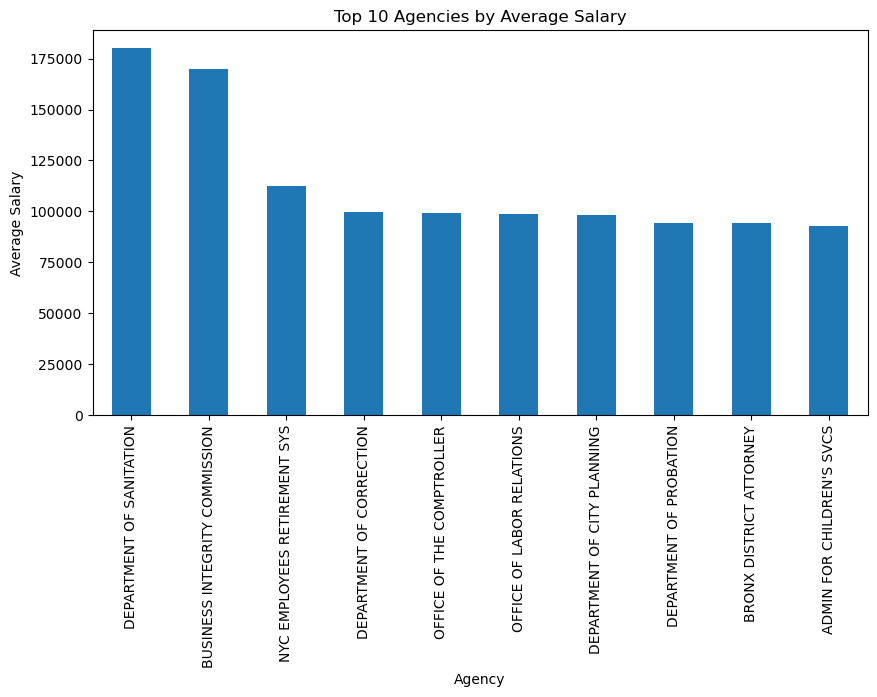

In [14]:
top_agencies = (
    df.groupby("Agency")["salary_mid"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_agencies.plot(kind="bar")
plt.title("Top 10 Agencies by Average Salary")
plt.ylabel("Average Salary")
plt.show()

## DATA CLEANING

In [15]:
df_clean = df.copy()

In [16]:
df_clean.isnull().sum().sort_values(ascending=False)

Recruitment Contact              5120
Post Until                       3616
Work Location 1                  3229
Hours/Shift                      3210
Additional Information           1862
Preferred Skills                 1219
To Apply                          426
Full-Time/Part-Time indicator     117
Minimum Qual Requirements          43
Agency                              0
Job ID                              0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Posting Type                        0
Salary Frequency                    0
Salary Range To                     0
Salary Range From                   0
Career Level                        0
Job Category                        0
Level                               0
Title Code No                       0
Title Classification                0
Division/Work Unit                  0
Work Location                       0
Job Description                     0
Residency Re

In [17]:
df_clean = df_clean.dropna(
    subset=["Salary Range From", "Salary Range To"]
)

In [18]:
df_clean["# Of Positions"] = df_clean["# Of Positions"].fillna(1)

In [19]:
cat_cols = [
    "Job Category",
    "Career Level",
    "Full-Time/Part-Time indicator",
    "Agency"
]

for col in cat_cols:
    df_clean[col] = df_clean[col].fillna("Unknown")

In [20]:
text_cols = [
    "Job Description",
    "Minimum Qual Requirements",
    "Preferred Skills"
]

for col in text_cols:
    df_clean[col] = df_clean[col].fillna("")

In [21]:
df_clean = df_clean.drop_duplicates()

In [22]:
salary_cols = ["Salary Range From", "Salary Range To"]

for col in salary_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

In [23]:
df_clean = df_clean.dropna(subset=salary_cols)

In [24]:
df_clean["salary_mid"] = (
    df_clean["Salary Range From"] + df_clean["Salary Range To"]
) / 2

In [25]:
Q1 = df_clean["salary_mid"].quantile(0.25)
Q3 = df_clean["salary_mid"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[
    (df_clean["salary_mid"] >= lower_bound) &
    (df_clean["salary_mid"] <= upper_bound)
]

In [26]:
df_clean.shape

(5001, 31)

In [27]:
df_clean.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator       0
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements           0
Preferred Skills                    0
Additional Information           1809
To Apply                          418
Hours/Shift                      3123
Work Location 1                  3152
Recruitment Contact              5001
Residency Requirement               0
Posting Date

In [28]:
df_clean.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date,salary_mid
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024,88694.0
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024,96626.0
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024,75043.5
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024,66851.0
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024,99223.5


In [29]:
df_clean["text_combined"] = (
    df_clean["Job Description"] + " " +
    df_clean["Minimum Qual Requirements"] + " " +
    df_clean["Preferred Skills"]
)

In [30]:
df_clean["is_full_time"] = df_clean["Full-Time/Part-Time indicator"].apply(
    lambda x: 1 if str(x).lower().startswith("f") else 0
)

In [31]:
df_clean["salary_log"] = np.log1p(df_clean["salary_mid"])

In [32]:
top_agencies = df_clean["Agency"].value_counts()
top_agencies = top_agencies[top_agencies >= 50].index

df_clean["Agency_clean"] = df_clean["Agency"].apply(
    lambda x: x if x in top_agencies else "Other"
)

In [33]:
num_features = [
    "# Of Positions",
    "is_full_time"
]

cat_features = [
    "Job Category",
    "Career Level",
    "Agency_clean"
]

text_feature = "text_combined"

In [34]:
X = df_clean[num_features + cat_features + [text_feature]]
y = df_clean["salary_mid"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [36]:
X_train_num = X_train[num_features]
X_test_num  = X_test[num_features]

X_train_cat = X_train[cat_features]
X_test_cat  = X_test[cat_features]

X_train_txt = X_train[text_feature]
X_test_txt  = X_test[text_feature]

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")

X_train_cat_enc = ohe.fit_transform(X_train_cat)
X_test_cat_enc  = ohe.transform(X_test_cat)

In [38]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")

X_train_cat_enc = ohe.fit_transform(X_train_cat)
X_test_cat_enc  = ohe.transform(X_test_cat)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=6000,
    stop_words="english",
    ngram_range=(1,2)
)

X_train_txt_vec = tfidf.fit_transform(X_train_txt)
X_test_txt_vec  = tfidf.transform(X_test_txt)

In [40]:
from scipy.sparse import hstack

X_train_final = hstack([
    X_train_num.values,
    X_train_cat_enc,
    X_train_txt_vec
])

X_test_final = hstack([
    X_test_num.values,
    X_test_cat_enc,
    X_test_txt_vec
])

### model building

#### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_final, y_train)

LinearRegression()

In [42]:
y_pred_lr = lr.predict(X_test_final)

print("Linear Regression")
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2  :", r2_score(y_test, y_pred_lr))

Linear Regression
MAE : 5778.4739481622555
RMSE: 16827.494270482188
R2  : 0.732102284053026


In [43]:
def regression_accuracy(y_true, y_pred, tolerance=0.10):
    """
    Calculates percentage of predictions within tolerance range.
    tolerance = 0.10 means ±10%
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    lower = y_true * (1 - tolerance)
    upper = y_true * (1 + tolerance)

    correct = (y_pred >= lower) & (y_pred <= upper)
    return correct.mean() * 100

In [44]:
acc_lr_10 = regression_accuracy(y_test, y_pred_lr, tolerance=0.10)
acc_lr_15 = regression_accuracy(y_test, y_pred_lr, tolerance=0.15)

print("Linear Regression Accuracy")
print("±10% Accuracy:", round(acc_lr_10, 2), "%")
print("±15% Accuracy:", round(acc_lr_15, 2), "%")

Linear Regression Accuracy
±10% Accuracy: 78.12 %
±15% Accuracy: 81.62 %


#### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=150,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_final.toarray(), y_train)

RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=42)

In [46]:
y_pred_rf = rf.predict(X_test_final.toarray())

print("Random Forest")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2  :", r2_score(y_test, y_pred_rf))

Random Forest
MAE : 5053.204457274159
RMSE: 9838.52645270569
R2  : 0.9084221963458015


In [47]:
def regression_accuracy(y_true, y_pred, tolerance=0.10):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    lower = y_true * (1 - tolerance)
    upper = y_true * (1 + tolerance)

    correct = (y_pred >= lower) & (y_pred <= upper)
    return correct.mean() * 100

In [48]:
y_pred_rf = rf.predict(X_test_final.toarray())

In [49]:
rf_acc_10 = regression_accuracy(y_test, y_pred_rf, tolerance=0.10)
rf_acc_15 = regression_accuracy(y_test, y_pred_rf, tolerance=0.15)

print("Random Forest Accuracy")
print("±10% Accuracy :", round(rf_acc_10, 2), "%")
print("±15% Accuracy :", round(rf_acc_15, 2), "%")

Random Forest Accuracy
±10% Accuracy : 78.52 %
±15% Accuracy : 86.91 %


 ### Gradient Boosting Regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_final.toarray(), y_train)

GradientBoostingRegressor(random_state=42)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_final.toarray(), y_train)

GradientBoostingRegressor(random_state=42)

In [52]:
y_pred_gb = gb.predict(X_test_final.toarray())

print("Gradient Boosting")
print("MAE :", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R2  :", r2_score(y_test, y_pred_gb))

Gradient Boosting
MAE : 9933.099672963546
RMSE: 13907.376063865957
R2  : 0.817012887137176


In [53]:
y_pred_gb = gb.predict(X_test_final.toarray())

In [54]:
def regression_accuracy(y_true, y_pred, tolerance=0.10):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    lower = y_true * (1 - tolerance)
    upper = y_true * (1 + tolerance)

    correct = (y_pred >= lower) & (y_pred <= upper)
    return correct.mean() * 100


In [55]:
gb_acc_10 = regression_accuracy(y_test, y_pred_gb, tolerance=0.10)
print("Gradient Boosting Accuracy (±10%):", round(gb_acc_10, 2), "%")

Gradient Boosting Accuracy (±10%): 50.65 %


In [56]:
gb_acc_15 = regression_accuracy(y_test, y_pred_gb, tolerance=0.15)
print("Gradient Boosting Accuracy (±15%):", round(gb_acc_15, 2), "%")

Gradient Boosting Accuracy (±15%): 65.73 %


In [57]:
def regression_accuracy(y_true, y_pred, tolerance=0.10):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    lower = y_true * (1 - tolerance)
    upper = y_true * (1 + tolerance)

    correct = (y_pred >= lower) & (y_pred <= upper)
    return correct.mean() * 100


In [58]:
# Linear Regression accuracy
lr_acc_10 = regression_accuracy(y_test, y_pred_lr, tolerance=0.10)

# Random Forest accuracy
rf_acc_10 = regression_accuracy(y_test, y_pred_rf, tolerance=0.10)

# Gradient Boosting accuracy
gb_acc_10 = regression_accuracy(y_test, y_pred_gb, tolerance=0.10)

In [59]:
final_results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Gradient Boosting"
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gb))
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb)
    ],
    "Accuracy (±10%)": [
        lr_acc_10,
        rf_acc_10,
        gb_acc_10
    ]
})

final_results

,Model,RMSE,R² Score,Accuracy (±10%)
0,Linear Regression,16827.494270,0.732102,78.121878
1,Random Forest,9838.526453,0.908422,78.521479
2,Gradient Boosting,13907.376064,0.817013,50.649351


In [60]:
final_results.round({
    "RMSE": 2,
    "R² Score": 3,
    "Accuracy (±10%)": 2
})

,Model,RMSE,R² Score,Accuracy (±10%)
0,Linear Regression,16827.49,0.732,78.12
1,Random Forest,9838.53,0.908,78.52
2,Gradient Boosting,13907.38,0.817,50.65


### Random Forest Hyperparameter tuning

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_tuned = RandomForestRegressor(
    n_estimators=300,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train_final.toarray(), y_train)

y_pred_rf_tuned = rf_tuned.predict(X_test_final.toarray())

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2 = r2_score(y_test, y_pred_rf_tuned)
acc_10 = regression_accuracy(y_test, y_pred_rf_tuned, tolerance=0.10)

print("Tuned Random Forest")
print("RMSE:", round(rmse, 2))
print("R2:", round(r2, 3))
print("Accuracy (±10%):", round(acc_10, 2), "%")


Tuned Random Forest
RMSE: 10087.49
R2: 0.904
Accuracy (±10%): 76.12 %


Among the evaluated models, Random Forest demonstrated the best overall performance with the lowest RMSE, highest R² score, and highest tolerance-based accuracy. Hyperparameter tuning was performed to further optimize performance. Gradient Boosting showed comparatively lower accuracy due to sensitivity to high-dimensional sparse text features.
